### Mission 3

Nous allons donc simuler un individu , la classe de revenu de ses parents grâce à un coefficient (propre à chaque pays ) mesurant une corrélation entre le revenu de l'individu et le revenu de ses parents. Ce coefficient sera ici appelé coefficient d'élasticité., il mesure la mobilité intergénérationnelle du revenu.

a = []
while(1):
    a.append('1')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




### Import des données 

In [0]:
# Code pour lire un fichier csv en colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# authentification google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 télécharger le fichier
downloaded = drive.CreateFile({'id':'1oMiB9Fq3FAdrdXHR8sPF03XhO3VQmFb9'}) 
downloaded.GetContentFile('df_projet_7.csv')

In [5]:
#import des données
df = pd.read_csv('df_projet_7.csv')
del df['Unnamed: 0']
df.head()

,Country_Code,Year,Quantile,Nb_quantiles,Income,Gdpppp,Country_Name,Population,Gini
0,ALB,2008,1,100,728.89795,7297.0,Albania,3002678.0,0.32141
1,ALB,2008,2,100,916.66235,7297.0,Albania,3002678.0,0.32141
2,ALB,2008,3,100,1010.91600,7297.0,Albania,3002678.0,0.32141
3,ALB,2008,4,100,1086.90780,7297.0,Albania,3002678.0,0.32141
4,ALB,2008,5,100,1132.69970,7297.0,Albania,3002678.0,0.32141


In [0]:
#2.1 télécharger le fichier
downloaded = drive.CreateFile({'id':'1ak4UDIzQlZTxUROWkwnbPoSWi-inSOtW'}) 
downloaded.GetContentFile('GDIMMay2018.csv')

In [7]:
#import des données
df_elasticity= pd.read_csv('GDIMMay2018.csv')
df_elasticity

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,cohort,parent,child,obs,P1,P2,P3,P4,P5,C1,C2,C3,C4,C5,MEANp,MEANc,SDp,SDc,GINIp,GINIc,IGP,NL1,NL2,COR,MAcatM,MAcatC1,Q4_IGpri,BHQ1,BHQ2,BHQ3,BHQ4,Q4BH,Q4child,Delta50,Asher_Q4_IGpri,ThreeGen_obs,ThreeGen_IGPp1,ThreeGen_IGPg1,ThreeGen_IGPgsd,All2125_MEANp,All2125_MEANc,All2125_IGP,All2125_MAcatC1,Cores2125_MEANp,Cores2125_MEANc,Cores2125_IGP,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,all,3956.0,0.666125,0.098583,0.170931,0.043031,0.021330,0.511857,0.025805,0.164191,0.183469,0.114678,2.480162,5.582401,3.809782,5.857765,0.728547,0.569981,0.802107,1.078013,-0.025322,0.521676,0.416691,0.414355,0.573748,0.341912,0.325161,0.209395,0.123532,0.162255,0.250311,3.408008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.10
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,daughter,721.0,0.615321,0.099272,0.212776,0.051969,0.020662,0.628481,0.023378,0.099265,0.132322,0.116553,2.989992,4.331731,4.010379,5.902685,0.675526,0.681604,0.848156,0.904866,-0.005200,0.576251,0.284895,0.283075,0.493111,0.434127,0.390918,0.101283,0.073671,0.285185,0.214735,1.859528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.10
2,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,avg,son,3235.0,0.678699,0.098412,0.160574,0.040819,0.021495,0.482992,0.026405,0.180261,0.196128,0.114214,2.353979,5.891941,3.748495,5.806141,0.741541,0.541870,0.807674,1.168599,-0.033091,0.521442,0.449310,0.446874,0.599971,0.322116,0.311027,0.232628,0.134229,0.122268,0.259117,3.740587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12996.0,0.089161,9516.0,0.307687,NaN,NaN,NaN,NaN,0.10
3,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,dad,all,4137.0,0.686581,0.047610,0.057309,0.150907,0.057594,0.514562,0.026047,0.165638,0.181551,0.112202,3.756049,5.538275,5.493762,5.842035,0.713742,0.572566,0.514428,0.578723,-0.004792,0.483760,0.354333,0.350244,0.548029,0.334443,0.317131,0.219586,0.128840,0.192434,0.250295,3.538447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25396.0,0.050447,18387.0,0.218062,NaN,NaN,NaN,NaN,0.10
4,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,1980,dad,daughter,744.0,0.639092,0.052328,0.054086,0.190100,0.064394,0.630354,0.022781,0.103736,0.129553,0.113576,4.520877,4.277768,5.804775,5.869737,0.660039,0.684751,0.491792,0.553255,-0.004494,0.486349,0.235170,0.230126,0.454504,0.429996,0.385429,0.104363,0.080212,0.339629,0.212542,1.974941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12246.0,0.047961,8677.0,0.230909,NaN,NaN,NaN,NaN,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6499,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,1980,max,daughter,1192.0,0.193782,0.273000,0.278278,0.138380,0.058767,0.519847,0.122754,0.147193,0.171519,0.020772,8.790254,5.346238,3.850706,5.218582,0.240446,0.536002,0.437543,-0.072278,0.028631,0.322856,0.211980,0.204545,0.525806,0.304184,0.315410,0.294525,0.085881,0.309017,0.233044,-1.947602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1830.0,0.023843,980.0,0.069934,NaN,NaN,NaN,NaN,0.16
6500,Zambia,ZMB,ZMB,Sub-Saharan Africa,Developing economies,Lower middle income,0,LCMS-VI,1980,Co-residents only,1980,max,son,1404.0,0.237626,0.249623,0.282923,0.121555,0.047556,0.502914,0.109372,0.138117,0.22

### Remplissage des données manquantes et reconstruction de dataset avec les coeffients d'elasticités

In [0]:
df_elasticity = df_elasticity.interpolate(method='values', limit_direction='forward', axis=0)

In [0]:
df_elasticity = df_elasticity[['countryname', 'IGEincome','iso3']]

In [10]:
df_elasticity.columns = ['Country_Name', 'IGEincome','Country_Code']
df_elasticity.head()

,Country_Name,IGEincome,Country_Code
0,Afghanistan,NaN,AFG
1,Afghanistan,NaN,AFG
2,Afghanistan,NaN,AFG
3,Afghanistan,NaN,AFG
4,Afghanistan,NaN,AFG


In [11]:
df_elasticity = df_elasticity.groupby(['Country_Name','Country_Code']).mean()
df_elasticity

,,IGEincome
Country_Name,Country_Code,
Afghanistan,AFG,NaN
Albania,ALB,0.800179
Angola,AGO,NaN
Argentina,ARG,0.719290
Armenia,ARM,0.538193
...,...,...
"Venezuela, RB",VEN,0.489313
Vietnam,VNM,0.494194
West Bank and Gaza,PSE,0.578500


In [12]:
df_elasticity =df_elasticity.reset_index().sort_values(by = 'Country_Name')
df_elasticity

,Country_Name,Country_Code,IGEincome
0,Afghanistan,AFG,NaN
1,Albania,ALB,0.800179
2,Angola,AGO,NaN
3,Argentina,ARG,0.719290
4,Armenia,ARM,0.538193
...,...,...,...
145,"Venezuela, RB",VEN,0.489313
146,Vietnam,VNM,0.494194
147,West Bank and Gaza,PSE,0.578500
148,"Yemen, Rep.",YEM,0.606312


#### Jointure des df

In [13]:
df = df.merge(df_elasticity, how='left', on='Country_Code')
df

,Country_Code,Year,Quantile,Nb_quantiles,Income,Gdpppp,Country_Name_x,Population,Gini,Country_Name_y,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,Albania,3002678.0,0.321410,Albania,0.800179
1,ALB,2008,2,100,916.66235,7297.00000,Albania,3002678.0,0.321410,Albania,0.800179
2,ALB,2008,3,100,1010.91600,7297.00000,Albania,3002678.0,0.321410,Albania,0.800179
3,ALB,2008,4,100,1086.90780,7297.00000,Albania,3002678.0,0.321410,Albania,0.800179
4,ALB,2008,5,100,1132.69970,7297.00000,Albania,3002678.0,0.321410,Albania,0.800179
...,...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,Congo,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11595,COD,2008,97,100,911.78340,303.19305,Congo,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11596,COD,2008,98,100,1057.80740,303.19305,Congo,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11597,COD,2008,99,100,1286.60290,303.19305,Congo,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633


In [14]:
del df['Country_Name_x']
df

,Country_Code,Year,Quantile,Nb_quantiles,Income,Gdpppp,Population,Gini,Country_Name_y,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,3002678.0,0.321410,Albania,0.800179
1,ALB,2008,2,100,916.66235,7297.00000,3002678.0,0.321410,Albania,0.800179
2,ALB,2008,3,100,1010.91600,7297.00000,3002678.0,0.321410,Albania,0.800179
3,ALB,2008,4,100,1086.90780,7297.00000,3002678.0,0.321410,Albania,0.800179
4,ALB,2008,5,100,1132.69970,7297.00000,3002678.0,0.321410,Albania,0.800179
...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11595,COD,2008,97,100,911.78340,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11596,COD,2008,98,100,1057.80740,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11597,COD,2008,99,100,1286.60290,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633


In [15]:
# renommer les colonnes
df.columns = ['Country_Code','Year','Quantile','Nb_quantiles','Income','Gdpppp','Population','Gini','Country_Name','IGEincome']
df

,Country_Code,Year,Quantile,Nb_quantiles,Income,Gdpppp,Population,Gini,Country_Name,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,3002678.0,0.321410,Albania,0.800179
1,ALB,2008,2,100,916.66235,7297.00000,3002678.0,0.321410,Albania,0.800179
2,ALB,2008,3,100,1010.91600,7297.00000,3002678.0,0.321410,Albania,0.800179
3,ALB,2008,4,100,1086.90780,7297.00000,3002678.0,0.321410,Albania,0.800179
4,ALB,2008,5,100,1132.69970,7297.00000,3002678.0,0.321410,Albania,0.800179
...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11595,COD,2008,97,100,911.78340,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11596,COD,2008,98,100,1057.80740,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11597,COD,2008,99,100,1286.60290,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633


In [16]:
# on utilise les données de l'année 2008
df= df.loc[df['Year']== 2008]
df

,Country_Code,Year,Quantile,Nb_quantiles,Income,Gdpppp,Population,Gini,Country_Name,IGEincome
0,ALB,2008,1,100,728.89795,7297.00000,3002678.0,0.321410,Albania,0.800179
1,ALB,2008,2,100,916.66235,7297.00000,3002678.0,0.321410,Albania,0.800179
2,ALB,2008,3,100,1010.91600,7297.00000,3002678.0,0.321410,Albania,0.800179
3,ALB,2008,4,100,1086.90780,7297.00000,3002678.0,0.321410,Albania,0.800179
4,ALB,2008,5,100,1132.69970,7297.00000,3002678.0,0.321410,Albania,0.800179
...,...,...,...,...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11595,COD,2008,97,100,911.78340,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11596,COD,2008,98,100,1057.80740,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633
11597,COD,2008,99,100,1286.60290,303.19305,4011486.0,0.459403,"Congo, Dem. Rep.",0.703633


In [17]:
# on regarde qu'il n'y aie pas des données manquantes 
df.groupby('Country_Code').count()

,Year,Quantile,Nb_quantiles,Income,Gdpppp,Population,Gini,Country_Name,IGEincome
Country_Code,,,,,,,,,
ALB,100,100,100,100,100,100,100,100,100
ARG,100,100,100,100,100,100,100,100,100
ARM,100,100,100,100,100,100,100,100,100
AUT,100,100,100,100,100,100,100,100,100
AZE,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...
UKR,100,100,100,100,100,100,100,100,100
URY,100,100,100,100,100,100,100,100,100
USA,100,100,100,100,100,100,100,100,100


### Coefficient d'élasticité de la Colombie - PJ plus élèvé

In [0]:
import scipy.stats as st
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


def generate_incomes(n, pj):
    # On génère les revenus des parents (exprimés en logs) selon une loi normale.
    # La moyenne et variance n'ont aucune incidence sur le résultat final (ie. sur le caclul de la classe de revenu)
    ln_y_parent = st.norm(0,1).rvs(size=n)
    # Génération d'une réalisation du terme d'erreur epsilon
    residues = st.norm(0,1).rvs(size=n)
    return np.exp(pj*ln_y_parent + residues), np.exp(ln_y_parent)
    
def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles+1, nb_quantiles/size) -0.5 +1./size)
    q_dict = {a:int(b) for a,b in zip(l_sorted,quantiles)}
    return pd.Series([q_dict[e] for e in l])

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child","c_i_parent"]
    return sample

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    
    if total == 0 :
        return [0] * nb_quantiles
    
    for q_p in range(1, nb_quantiles+1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib += [nb / total]
        else:
            distrib += [0]
    return distrib   

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child","c_i_parent"]).apply(len)
    counts = counts.reset_index()
    counts.columns = ["c_i_child","c_i_parent","counts"]
    
    mat = []
    for child_quantile in np.arange(nb_quantiles)+1:
        subset = counts[counts.c_i_child == child_quantile]
        mat += [distribution(subset, nb_quantiles)]
    return np.array(mat) 

def plot_conditional_distributions(p, cd, nb_quantiles):
    plt.figure(figsize=(15,10))
    
    # La ligne suivante sert à afficher un graphique en "stack bars", sur ce modèle : https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
    cumul = np.array([0] * nb_quantiles)
    
    for i, child_quantile in enumerate(cd):
        plt.bar(np.arange(nb_quantiles)+1, child_quantile, bottom=cumul, width=0.95, label = str(i+1) +"e")
        cumul = cumul + np.array(child_quantile)

    plt.axis([.5, nb_quantiles*1.3 ,0 ,1])
    plt.title("p=" + str(p))
    plt.legend()
    plt.xlabel("quantile parents")
    plt.ylabel("probabilité du quantile enfant")
    plt.show()
    
def proba_cond(c_i_parent, c_i_child, mat):
    return mat[c_i_child, c_i_parent]


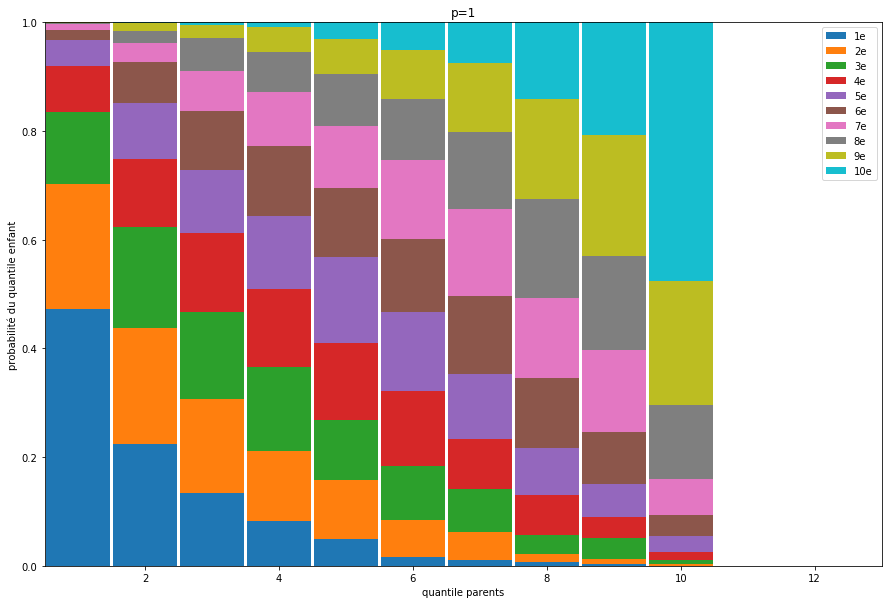

[[0.472 0.224 0.134 0.082 0.05  0.017 0.011 0.007 0.003 0.   ]
 [0.231 0.213 0.173 0.129 0.108 0.068 0.051 0.014 0.009 0.004]
 [0.131 0.186 0.159 0.155 0.111 0.098 0.079 0.036 0.039 0.006]
 [0.086 0.126 0.147 0.144 0.14  0.138 0.092 0.073 0.039 0.015]
 [0.048 0.103 0.115 0.133 0.159 0.145 0.119 0.087 0.061 0.03 ]
 [0.018 0.074 0.108 0.129 0.127 0.136 0.145 0.129 0.096 0.038]
 [0.01  0.035 0.075 0.1   0.114 0.144 0.159 0.147 0.15  0.066]
 [0.003 0.023 0.06  0.074 0.095 0.112 0.142 0.182 0.172 0.137]
 [0.001 0.014 0.023 0.045 0.065 0.091 0.127 0.184 0.223 0.227]
 [0.    0.002 0.006 0.009 0.031 0.051 0.075 0.141 0.208 0.477]]


In [19]:
pj = 1      # coefficient d'élasticité du pays j
nb_quantiles = 10   # nombre de quantiles (nombre de classes de revenu)
n  = 1000*nb_quantiles   # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)



### Coefficient d'élasticité de la Finlande- Pj plus faible

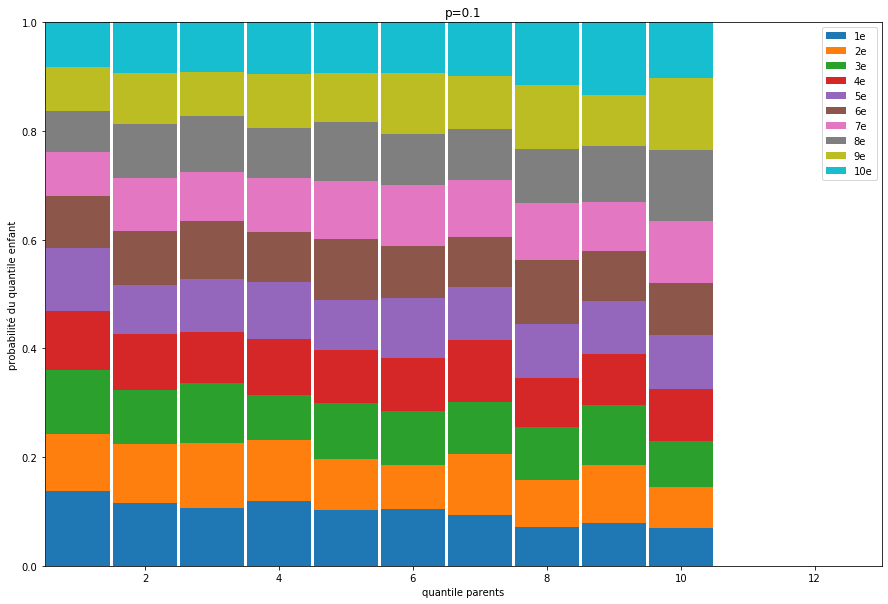

[[0.137 0.115 0.107 0.119 0.103 0.105 0.094 0.072 0.079 0.069]
 [0.106 0.109 0.119 0.112 0.094 0.08  0.111 0.086 0.107 0.076]
 [0.118 0.099 0.11  0.084 0.102 0.1   0.096 0.098 0.109 0.084]
 [0.107 0.104 0.095 0.103 0.098 0.098 0.114 0.09  0.095 0.096]
 [0.117 0.09  0.097 0.104 0.092 0.109 0.097 0.098 0.097 0.099]
 [0.095 0.099 0.106 0.092 0.112 0.097 0.093 0.118 0.092 0.096]
 [0.082 0.098 0.09  0.099 0.107 0.111 0.104 0.105 0.09  0.114]
 [0.075 0.098 0.104 0.093 0.108 0.094 0.095 0.099 0.103 0.131]
 [0.08  0.095 0.081 0.099 0.091 0.113 0.097 0.118 0.094 0.132]
 [0.083 0.093 0.091 0.095 0.093 0.093 0.099 0.116 0.134 0.103]]


In [20]:
pj =0.1      # coefficient d'élasticité du pays j
nb_quantiles = 10  # nombre de quantiles (nombre de classes de revenu)
n  =  1000*nb_quantiles # taille de l'échantillon

y_child, y_parents = generate_incomes(n, pj)
sample = compute_quantiles(y_child, y_parents, nb_quantiles)
cd = conditional_distributions(sample, nb_quantiles)
plot_conditional_distributions(pj, cd, nb_quantiles) # Cette instruction prendra du temps si nb_quantiles > 10
print(cd)


### construction de dataframe enfant/parent

In [21]:
# dataframe enfant/parent
columns=['Country_Code', 'ln_yparent', 'epsilone', 'pj', 'ychild', 'cparent', 'cchild']
parent_child = pd.DataFrame(columns=columns)

# quantité d'unités de l'echantillon
n = 1000 * 100

#calcule d ychild
def ychild(row):    
    return np.exp(row['pj'] * row['ln_yparent'] + row['epsilone'])

# iteration principale
for country in df.Country_Code.drop_duplicates():

    #  IGM Coefficient
    pj = df[df.Country_Code == country]['IGEincome'].iloc[0]

    # calcule de valeurs
    s1 = pd.Series(np.random.normal(size=n))
    s1.name = "ln_yparent"
    s2 = pd.Series(np.random.normal(size=n))
    s2.name = "epsilone"
    # Concatenation
    temp_df = pd.concat([s1, s2], axis=1)
    temp_df['pj'] = pj
    temp_df['ychild'] = temp_df.apply(ychild, axis=1)

    # Calcule cparent
    percentiles = np.argsort(np.argsort(temp_df['ln_yparent'])) * 100. / (len(temp_df['ln_yparent']) - 1)
    percentiles = np.ceil(percentiles).astype(int)
    temp_df['cparent'] = percentiles

    # Calcule cchild
    percentiles = np.argsort(np.argsort(temp_df['ychild'])) * 100. / (len(temp_df['ychild']) - 1)
    percentiles = np.ceil(percentiles).astype(int)
    temp_df['cchild'] = percentiles

    # Addition de variable Country_Name
    temp_df['Country_Code'] = country

    # Append à df temp
    parent_child = parent_child.append(temp_df, sort=False)

# Display result
display(parent_child.shape)
display(parent_child.head())

(7500000, 7)

,Country_Code,ln_yparent,epsilone,pj,ychild,cparent,cchild
0,ALB,-0.204323,-0.474299,0.800179,0.528457,42,32
1,ALB,-0.940798,-0.404884,0.800179,0.314211,18,19
2,ALB,-0.309873,-0.528270,0.800179,0.460140,38,28
3,ALB,1.522322,0.095780,0.800179,3.720698,94,85
4,ALB,-0.675399,0.138446,0.800179,0.668984,25,38


### Constrcution de dataframe des probabilités conditionelles

In [22]:
df_prob = {
    'Country_Code':[],
    'c_child':[],
    'c_parent':[],
    'prob':[]
}

for country in df.Country_Code.drop_duplicates():
    
    data = parent_child[parent_child.Country_Code == country]
    len_total = len(data)

    for c_child in range(1,101):
        
        # Probabilité d'avoir cette classe d'enfant
        this_child = data[data['cchild'] == c_child]
        child_prob = len(this_child) / len_total

        for c_parent in range(1,101):
            
            # Probabilité d'avoir cette classe d'enfant ET cette classe de parent
            this_prob = len(this_child[this_child['cparent'] == c_parent]) / len_total

            # Probabilité d'avoir cette classe de parent sachant la classe de l'enfant
            cond_prob = this_prob / child_prob    

            # On rajoute la probabilité conditionnelle dans le dataframe
            df_prob[ 'Country_Code'].append(country)
            df_prob['c_child'].append(c_child)
            df_prob['c_parent'].append(c_parent)
            df_prob['prob'].append(cond_prob)
            
df_prob = pd.DataFrame(df_prob)

display(df_prob.shape)
display(df_prob.head())

(750000, 4)

,Country_Code,c_child,c_parent,prob
0,ALB,1,1,0.204204
1,ALB,1,2,0.123123
2,ALB,1,3,0.069069
3,ALB,1,4,0.072072
4,ALB,1,5,0.054054


### Construction de dataframe final pour mission 4

In [23]:
final_df = {
    'Country_Code':[],
    'Country_Name':[],
    'Quantile':[],
    'c_parent':[],
    'Population':[],
    'Gini':[],
    'Gdpppp':[],
    'Income':[],
}

# Row
for i in range(0,len(df)):
    row = df.iloc[i]
    data = df_prob[df_prob[ 'Country_Code'] == row[ 'Country_Code']]
    data = data[data['c_child'] == row['Quantile']]
    
    # Parent
    for j in range(1,101):
        
        # Nombre de  parents
        n = int(round(data[data['c_parent'] == j]['prob'].iloc[0] * 500))
        
        # Copie de  valuers n fois
        final_df['Country_Code'].extend([row['Country_Code']]*n)
        final_df['Country_Name'].extend([row['Country_Name']]*n)
        final_df['Quantile'].extend([row['Quantile']]*n)
        final_df['Income'].extend([row['Income']]*n)
        final_df['Population'].extend([row['Population']]*n)
        final_df['Gini'].extend([row['Gini']]*n)
        final_df['Gdpppp'].extend([row['Gdpppp']]*n)
        final_df['c_parent'].extend([j]*n)
        
final_df = pd.DataFrame(final_df)
display(final_df.shape)
display(final_df.head())

(3827588, 8)

,Country_Code,Country_Name,Quantile,c_parent,Population,Gini,Gdpppp,Income
0,ALB,Albania,1,1,3002678.0,0.32141,7297.0,728.89795
1,ALB,Albania,1,1,3002678.0,0.32141,7297.0,728.89795
2,ALB,Albania,1,1,3002678.0,0.32141,7297.0,728.89795
3,ALB,Albania,1,1,3002678.0,0.32141,7297.0,728.89795
4,ALB,Albania,1,1,3002678.0,0.32141,7297.0,728.89795


In [24]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
final_df.to_csv('df_projet_7_final.csv')
!cp df_projet_7_final.csv drive/My\ Drive/

In [0]:
df_prob.to_csv('df_projet_7_prob.csv')
!cp df_projet_7_prob.csv drive/My\ Drive/